# Работа с массивами данных при помощи Pandas

Нам понадобится `pip install pandas scipy tables vitables`.

Из дополнительных материалов рекомендуется этот текст: https://khashtamov.com/ru/pandas-introduction/

Мы немножко попробуем, как [Карлсон](https://web.archive.org/web/20190305185555if_/https://cs10.pikabu.ru/post_img/2018/07/10/4/1531199339121474094.jpg).

Будем сразу играть за две стороны. Точнее за три. За хорошего математика, за плохого математика и за себя.

## Хороший математик

Откуда-то взял числа, нормально распределённые. Наверное, он делал рассчеты по этой лабораторной работе до двух часов ночи и захотел найти им хотя бы такое практическое применение.

In [3]:
%matplotlib inline  

import pandas
import random

import matplotlib
import numpy
import matplotlib.pyplot as plt

Эти данные нам прислал хороший математик. Для этого он воспользовался форматом CSV.

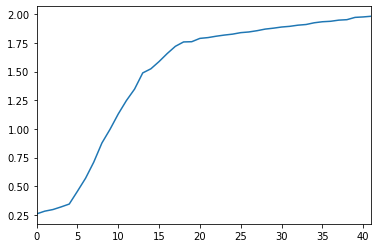

In [4]:

df1 = pandas.read_csv("experiments.csv")

df1['experiments'].plot()

Посмотрим на *плотность распределения*...

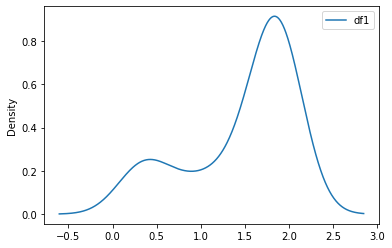

In [5]:
df12 = pandas.DataFrame(data={
    'df1': df1['experiments'],
})

df12.plot.kde()

А мы можем это оценить численно, или нет? Можем. При помощи критерия Колмогорова-Смирнова.

Гипотеза: данное распределение близко к нормальному.

В результате проверки вычисляются два числа — *К-С-статистика* и *P-значение*. Если первое мало или второе велико, мы гипотезу отвергнуть не можем. В противном случае, гипотеза может считаться ошибочной.

In [6]:
from scipy import stats

d1 = df12['df1']

# If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.
print(stats.kstest(d1, 'norm', (d1.mean(), d1.std())))

KstestResult(statistic=0.25755530841035623, pvalue=0.0060460009114237925)
